In [1]:
!pip install -U langchain langchain-community openai sentence-transformers faiss-cpu tiktoken


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.0/765.0 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

**Step 2: Import Libraries**

In [2]:
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA


In [3]:
import os
#os.environ["OPENAI_API_KEY"] = "sk-your-api-key"

In [4]:
!pip install -U langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.7 MB/s eta 0:00:00


**Create the RetrievalQA Chain (RAG system)**

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

script_text = """
INT. COFFEE SHOP – DAY
A young couple sits quietly. The silence is thick with emotion.

SARAH
I can't keep doing this, Jake.

JAKE
(softly)
Neither can I.

They look away from each other.

INT. PARK – EVENING
Children play in the distance. Jake walks alone.

JAKE
(voiceover)
I never knew silence could be so loud.

INT. APARTMENT – NIGHT
Sarah throws a photograph onto the bed and sighs.
"""

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
chunks = splitter.split_text(script_text)

print(f"✅ Total chunks created: {len(chunks)}")


✅ Total chunks created: 2


In [6]:
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = FAISS.from_texts(chunks, embedding_model)

/tmp/ipython-input-6-2993220499.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  war

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
from langchain.chains import RetrievalQA
from langchain_openai import OpenAI

llm = OpenAI(temperature=0)
qa_chain = RetrievalQA.from_chain_type(llm=llm, retriever=vectorstore.as_retriever())


In [8]:
query = "What happens between Sarah and Jake?"
response = qa_chain.run(query)
print("🎬 Answer:", response)


/tmp/ipython-input-8-2356094322.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


🎬 Answer:  It appears that Sarah and Jake are having relationship issues and are possibly breaking up.


In [9]:
from transformers import pipeline
emotion_classifier = pipeline("text-classification", model="nateraw/bert-base-uncased-emotion")
emotion_classifier("I can't keep doing this, Jake.")


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'sadness', 'score': 0.9128822088241577}]

**RAGflix Pro – Scene Retrieval + Rewrite + Mood AI**

Features to Implement (Impressively Useful) <br>
🔍 Scene Search	LangChain + FAISS/Pinecone + HuggingFace	Vector search + embeddings <br>
🎭 Emotion Tagging	nateraw/bert-base-uncased-emotion	NLP classifier pipeline <br>
🧠 Rewrite Scenes	OpenAI LLM with prompt engineering	Prompt design + generation<br>
🎛️ Mood Filters	Scene metadata + filtering logic	Custom retriever logic<br>
🎥 Scene Snippets (optional)	Subtitles + timestamps	Multimodal potential<br>
🌐 Streamlit Frontend	Streamlit + LangChain chain backend	ML + UX integration<br>
📝 Saved Scene Journal	Export scene + rewrite as PDF or .md	Backend utilities<br>
✅ GitHub Portfolio	README, screencast GIF, badges	Presentation polish

In [10]:
!pip install matplotlib seaborn plotly wordcloud scikit-learn


In [11]:
scene_emotions = ['sadness', 'anger', 'joy', 'joy', 'fear', 'sadness', 'joy']


/tmp/ipython-input-12-1383019197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()), palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


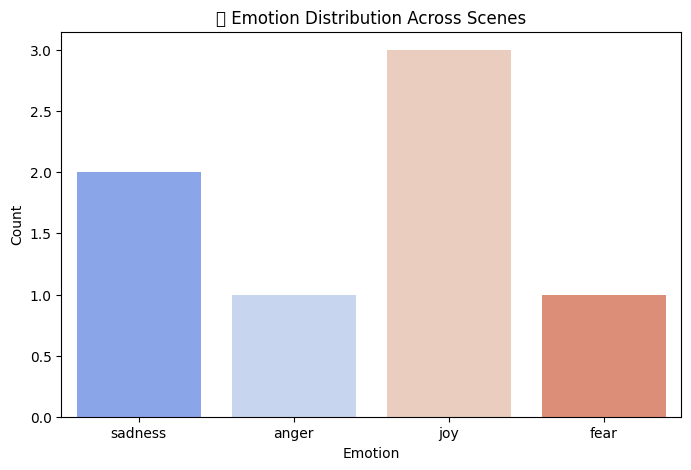

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

emotion_counts = Counter(scene_emotions)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()), palette="coolwarm")
plt.title("🎭 Emotion Distribution Across Scenes")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


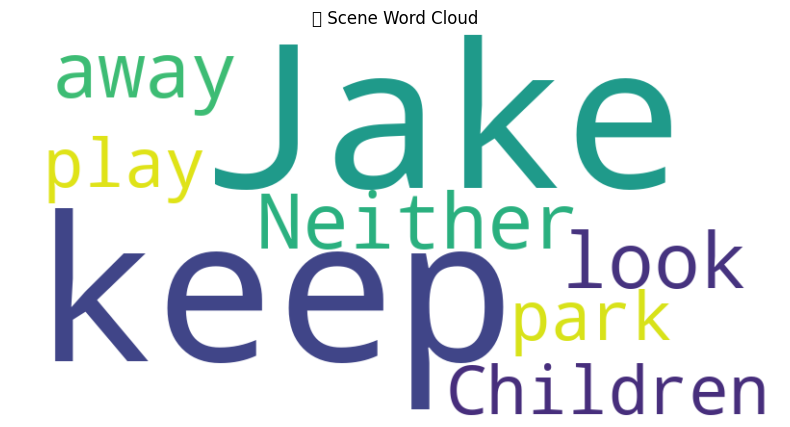

In [14]:
scene_text = "I can't keep doing this Jake. Neither can I. They look away. Children play in the park..."
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(scene_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("📝 Scene Word Cloud")
plt.show()


# **Visualize Embedding Clusters (PCA or t-SNE)**

In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Example: 10 fake 384-d embeddings
X = np.random.rand(10, 384)
labels = ['joy', 'fear', 'sadness', 'joy', 'anger', 'joy', 'sadness', 'joy', 'anger', 'fear']


# **PCA Plot**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


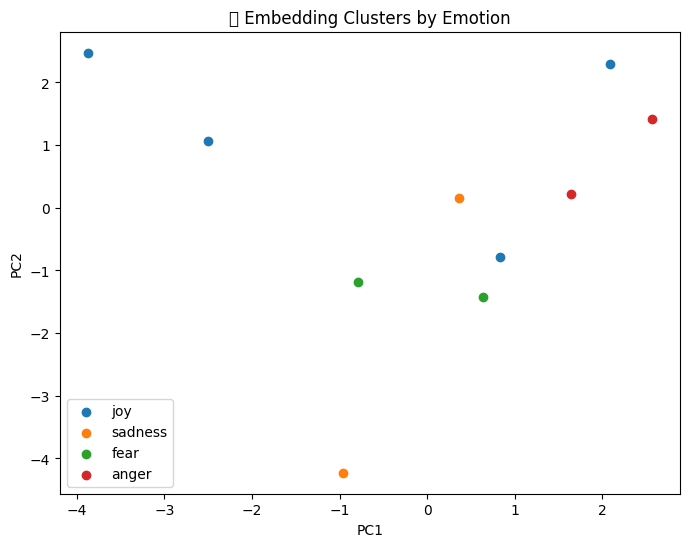

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i, label in enumerate(set(labels)):
    indices = [j for j in range(len(labels)) if labels[j] == label]
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label)

plt.title("📍 Embedding Clusters by Emotion")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


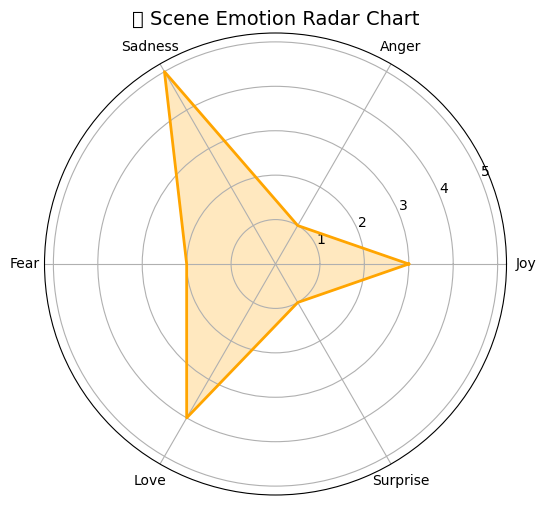

In [18]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Joy', 'Anger', 'Sadness', 'Fear', 'Love', 'Surprise']
values = [3, 1, 5, 2, 4, 1]  # Replace with actual counts

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='orange', linewidth=2)
ax.fill(angles, values, color='orange', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("🎭 Scene Emotion Radar Chart", size=14)
plt.show()


#**Interactive Time-Series of Emotions (Plotly)**

In [19]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'Scene #': list(range(1, 11)),
    'Emotion Score (Joy)': np.random.randint(0, 5, size=10),
    'Emotion Score (Sadness)': np.random.randint(0, 5, size=10),
})

fig = px.line(df, x="Scene #", y=["Emotion Score (Joy)", "Emotion Score (Sadness)"],
              title="📊 Emotion Over Time", markers=True)
fig.show()


# **Emotion vs Genre Heatmap**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



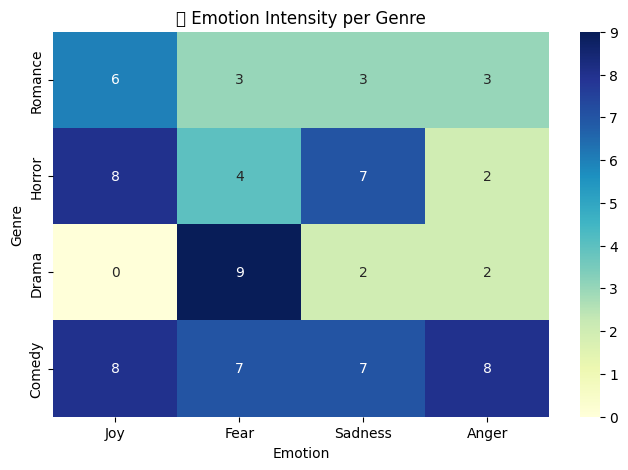

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

genres = ['Romance', 'Horror', 'Drama', 'Comedy']
emotions = ['Joy', 'Fear', 'Sadness', 'Anger']

# Fake data matrix
data = np.random.randint(0, 10, size=(len(genres), len(emotions)))
df = pd.DataFrame(data, index=genres, columns=emotions)

plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='d')
plt.title("🔥 Emotion Intensity per Genre")
plt.xlabel("Emotion")
plt.ylabel("Genre")
plt.show()


# **Word Frequency Bubble Chart (for scene dialogue)**

In [21]:
from collections import Counter
import plotly.express as px

scene_text = "Jake walks alone in the park. Sarah waits silently. Silence. Loneliness. Park. Jake."
words = [w.lower() for w in scene_text.split() if len(w) > 3]
word_freq = dict(Counter(words))

df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
fig = px.scatter(df, x='word', y='frequency', size='frequency', color='word',
                 title="🗯️ Word Frequency Bubble Chart", size_max=60)
fig.show()


# **Conversational Memory: Scene-Aware Chat**

In [24]:
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
qa_convo = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=vectorstore.as_retriever(),
    memory=memory,
)

result = qa_convo({"question": "What does Sarah say to Jake?"})
print(result["answer"])

# Later…
followup = qa_convo({"question": "And how does Jake react to that?"})
print(followup["answer"])


/tmp/ipython-input-24-748440834.py:4: LangChainDeprecationWarning:

Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/

/tmp/ipython-input-24-748440834.py:11: LangChainDeprecationWarning:

The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.



 "I can't keep doing this, Jake."
 Jake responds softly, saying "Neither can I."


# **LangChain Agents: Multi-step Scene Querying**

Use LangChain Agents to answer compound or high-level questions, like:

“Find a sad scene, rewrite it happily, then summarize it.”

LangChain will break that into:

Retrieval → Rewrite → Summarize
And auto-chain tools for you.

In [26]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Prompt for rewriting a scene
rewrite_template = PromptTemplate(
    input_variables=["scene_text", "tone"],
    template="""
You're a screenwriter. Rewrite the following scene with a {tone} tone:
Scene:
{scene_text}

Rewritten Scene:
"""
)

# Chain using the OpenAI LLM
rewriter_chain = LLMChain(llm=llm, prompt=rewrite_template)

# This is what your agent will call
def custom_rewrite_function(scene_text="I can't keep doing this, Jake.", tone="comedic"):
    return rewriter_chain.run(scene_text=scene_text, tone=tone)


/tmp/ipython-input-26-2114503508.py:17: LangChainDeprecationWarning:

The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.



In [27]:
from langchain.agents import initialize_agent, Tool
from langchain.agents.agent_types import AgentType

tools = [
    Tool(name="Scene Retriever", func=qa_chain.run, description="Use for finding scenes"),
    Tool(name="Scene Rewriter", func=custom_rewrite_function, description="Rewrite scene in new tone")
]

agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

response = agent.run("Give me a sad scene, rewrite it humorously, and summarize it.")
print(response)


/tmp/ipython-input-27-3941430143.py:9: LangChainDeprecationWarning:

LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.





> Entering new AgentExecutor chain...
 I should use the Scene Retriever to find a sad scene, then use the Scene Rewriter to rewrite it in a humorous tone. Finally, I can summarize the scene myself.
Action: Scene Retriever
Action Input: "sad"
Observation:  It seems like the context suggests that the couple is going through a difficult time and are feeling sad.
Thought: Now, I can use the Scene Rewriter to change the tone to comedic.
Action: Scene Rewriter
Action Input: scene_text="I can't keep doing this, Jake.", tone='comedic'
Observation: 
Jake: (panting) What's wrong, babe? Did you finally realize you can't keep up with my amazing stamina?

Samantha: (rolling her eyes) No, Jake. I can't keep pretending to enjoy your terrible cooking.

Jake: (offended) Hey, my burnt toast and overcooked eggs are a delicacy in some countries!

Samantha: (deadpan) Yeah, maybe in the land of the tasteless.

Jake: (pouts) Fine, I'll stick to ordering takeout from now on.

Samantha: (smirking) Thank good

# 🧩 **3. Scene Rewriter Chain (PromptTemplates)**

In [28]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

template = """
You're a screenwriter. Rewrite the following movie scene with a {tone} tone:
Scene:
{scene_text}

Rewritten Scene:
"""
prompt = PromptTemplate(input_variables=["scene_text", "tone"], template=template)
rewriter = LLMChain(llm=llm, prompt=prompt)

result = rewriter.run(scene_text="I can't keep doing this, Jake.", tone="comedic")
print(result)



Jake: (frantically pacing) I can't keep doing this, man. It's too much!

Samantha: (sarcastically) Oh, I'm sorry, Jake. I didn't realize being a professional couch potato was such a tough gig.

Jake: (defensively) Hey, it takes a lot of skill and dedication to binge-watch an entire season in one sitting.

Samantha: (rolling her eyes) Right, because that's a real talent.

Jake: (sighing) Look, I just can't keep up with all these new shows. There's too many options!

Samantha: (smirking) Oh, poor Jake. The struggle is real.

Jake: (dramatically) It's like I'm drowning in a sea of streaming services and I can't find my way back to shore.

Samantha: (deadpan) Wow, you really know how to paint a picture.

Jake: (pouting) Fine, make fun of me all you want. But I'm serious, I need help.

Samantha: (smiling) Don't worry, buddy. I'll be your lifeguard and guide you through this treacherous TV landscape.

Jake: (grinning) Thanks


In [29]:
from langchain.callbacks import StdOutCallbackHandler

handler = StdOutCallbackHandler()
qa_chain = RetrievalQA.from_chain_type(llm=llm, retriever=vectorstore.as_retriever(), callbacks=[handler])

response = qa_chain.run("Where is the emotional peak?")




> Entering new RetrievalQA chain...

> Finished chain.
